## Final Project Submission

* Student name: Brad Blackwood
* Student pace: full time
* Project date: 2021-12-10 
* Instructor name: Mark Barbour
* Blog post URL: https://medium.com/@brad.blackwood.03/all-roads-led-me-to-datascience-f0c87b5dcbc1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#LOADING DATA INTO PANDAS DF FROM 'zippedData/'
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
imdb_name_basics = pd.read_csv('zippedData/imdb.name.basics.csv')
title_alias = pd.read_csv('zippedData/imdb.title.akas.csv') #Not Particularly useful (Title and region data)
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv') #Contains Genre info and Title
title_crew = pd.read_csv('zippedData/imdb.title.crew.csv') #Contains Director ID and Writer ID
title_principals = pd.read_csv('zippedData/imdb.title.principals.csv')
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv')
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t')
reviews = pd.read_csv('zippedData/rt.reviews.tsv', sep='\t', encoding= 'unicode_escape')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv')
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
print('nessisary files loaded into pandas successfully')

nessisary files loaded into pandas successfully


In [3]:
#EDA FOR SEPERATING GENRES FOR ANALYSIS
    #WORKS WITH CELL BELOW

    #FINDS UNIQUE GENRES FOR COLUMN CREATION
genre_df = title_basics['genres'].str.split(',', expand=True)
genre_df = pd.melt(genre_df)
genre_list = list(set(genre_df['value']))
genre_list.remove(np.nan)
genre_list.remove(None)

genre_col_df = pd.DataFrame(columns=genre_list)

extended_genre_df = pd.concat([title_basics, genre_col_df], axis=1)

len(extended_genre_df.columns[7:]) #NUMBER OF UNIQUE GENRE COLUMNS = 26

genre_df_filled = extended_genre_df.dropna(axis=0, subset=['genres'], inplace=False).reset_index().copy()

genre_df_filled.head(2)

,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,History,Short,Documentary,...,Adventure,Drama,Sport,Sci-Fi,Biography,Reality-TV,War,Family,Adult,Action
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#EDA SPLITS DATA ASSIGNS 1/0 TO GENRES IN COLUMNS 1=TRUE 0=FALSE
    #LOGIC WORKS TAKES A LONG TIME TO RUN
    #WORKS IN CONJUNCTION WITH CELL ABOVE
    #MUCH SLOWER COMPARED TO MELT METHOD BELOW
    
# pd.options.mode.chained_assignment = None 


#OLD METHOD FOR SEPERATING DATA. NOT USED IN ANALYSIS.
# for genre in genre_df_filled.columns[7:]:
#     for row in range(0, genre_df_filled.shape[0]): #genre_df_filled.shape[0]
#         if genre_df_filled['genres'][row] in genre:
#             genre_df_filled[genre][row] = 1
#         else:
#             genre_df_filled[genre][row] = 0

# genre_df_filled #2000x26 = 52,0000 (40s) -> 140735x26 = 3,659,110 (47mins)

In [5]:
#METHOD FOR SEPERATING GENRE DATA
#SPLITS 'GENRES' ON ',' TO CREATE NEW COLUMNS
genre_split_df = pd.concat([title_basics, title_basics['genres'].str.split(',', expand=True)], axis=1)

#GENRE COLUMNS ARE MELTED TO CREATE SOLE VALUE COLUMN TO ANALYIZE GENRE DATA 
melted_df = pd.melt(genre_split_df ,id_vars=list(title_basics.columns)).dropna(axis=0, subset=['value'])

melted_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,variable,value
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",0,Action
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,Biography
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",0,Comedy
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,Comedy


In [6]:
#TRANSORMING DATA SET
    #RUN ONCE
movie_budgets['Year'] = movie_budgets.apply(lambda x: x['release_date'][-4:], axis=1).astype(int)
movie_budgets['production_budget'] = movie_budgets.apply(lambda x: x['production_budget'].strip('$').replace(',',''), axis=1).astype('int')
movie_budgets['worldwide_gross'] = movie_budgets.apply(lambda x: x['worldwide_gross'].strip('$').replace(',',''), axis=1).astype('int')

movie_budgets['ROI'] = (movie_budgets['worldwide_gross']-movie_budgets['production_budget'])/movie_budgets['production_budget']

#REMOVING UNNESSESARY COLUMNS
movie_budgets_mod = movie_budgets.drop(['domestic_gross', 'id'], axis=1)

movie_budgets_mod.head()

,release_date,movie,production_budget,worldwide_gross,Year,ROI
0,"Dec 18, 2009",Avatar,425000000,2776345279,2009,5.532577
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,2011,1.546673
2,"Jun 7, 2019",Dark Phoenix,350000000,149762350,2019,-0.572108
3,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963,2015,3.243841
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,2017,3.153696


In [7]:
#FILTERS NULL DATA FOR 'worldwide_gross'
movie_budgets_mod = movie_budgets_mod[movie_budgets_mod['worldwide_gross'] != 0] #367 entries with missing gross

In [8]:
#COMBINE DATASETS BASED ON TITLE AND YEAR

#https://stackoverflow.com/questions/53549492/joining-two-pandas-dataframes-based-on-multiple-conditions
added_roi_to_melt_df = movie_budgets_mod.merge(melted_df, 
                                               how='inner', 
                                               left_on=['movie', 'Year'], 
                                               right_on=['primary_title', 'start_year'])
melt_pivot = added_roi_to_melt_df.pivot(index=['tconst', 'movie', 'Year'], 
                                        columns=['value'], 
                                        values='ROI')
genre_roi_by_year = melt_pivot.groupby(by='Year', 
                                       axis=0).median()

In [9]:
movie_budgets_mod.sort_values(by='worldwide_gross').head()

,release_date,movie,production_budget,worldwide_gross,Year,ROI
5302,"Dec 11, 2015",American Hero,1000000,26,2015,-0.999974
5335,"Nov 21, 2014",Food Chains,913000,176,2014,-0.999807
5770,"Aug 14, 2008",The Rise and Fall of Miss Thang,10000,401,2008,-0.959900
5518,"Oct 13, 2005",The Dark Hours,400000,423,2005,-0.998942
5383,"Dec 31, 2014",Destiny,750000,450,2014,-0.999400


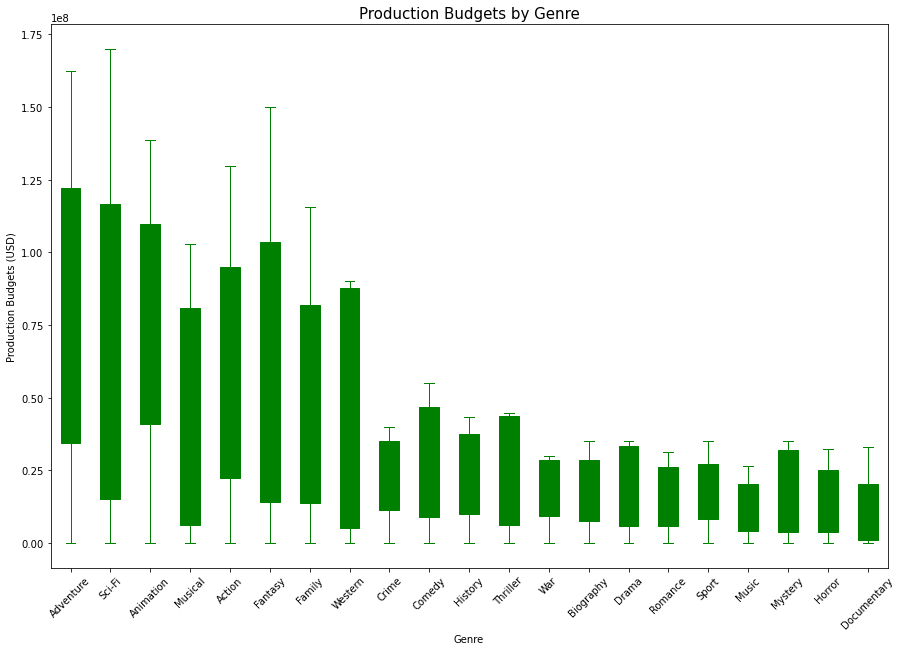

In [10]:
budget_pivot = added_roi_to_melt_df.pivot(index=['tconst', 'movie', 'Year'], 
                                          columns=['value'], 
                                          values='production_budget')
# SORTING BY MEDIAN HIGH TO LOW
median_budgets = budget_pivot.median()
median_budgets.sort_values(ascending=False, inplace=True)
budget_pivot = budget_pivot[median_budgets.index]
# CREATING DETAILS FOR THE FIGURE
budget_boxplot = budget_pivot.describe()
ax = budget_boxplot.boxplot(figsize=(15,10), rot=45, showfliers=False, color='green', patch_artist=True, grid=False)

#TODOS -- CHANGE COLOR TO HIGHLIGHT TOP 10 GENRES
# plt.setp(budget_boxplot["Action"], color='red')

ax.set_title('Production Budgets by Genre', fontsize=15)
ax.set_ylabel('Production Budgets (USD)')
ax.set_xlabel('Genre')

plt.savefig('Budgets');

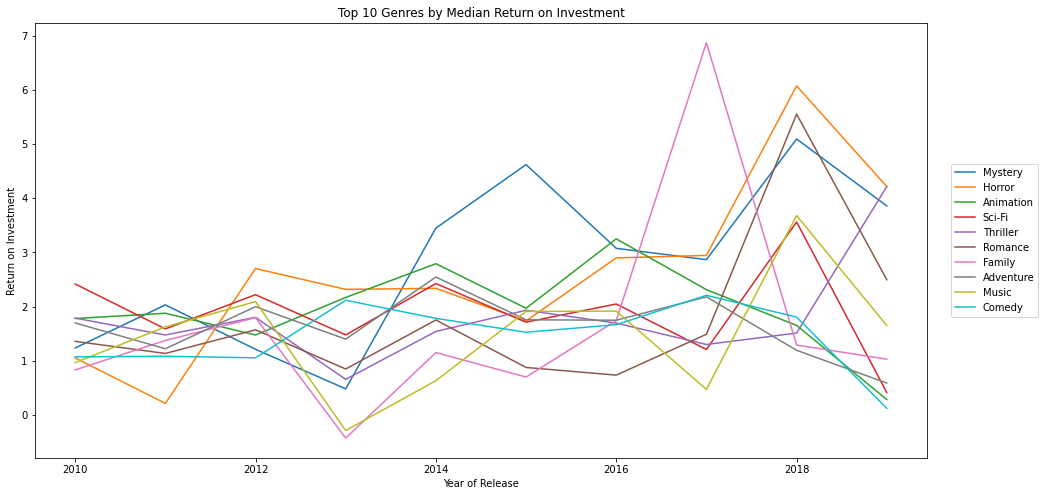

In [11]:
#TODOS -- CHANGE LABEL TO INCLUDES 2019 ENDPOINT
top_10_roi_genres = genre_roi_by_year.sum().sort_values(ascending=False)[0:10].index

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(genre_roi_by_year[top_10_roi_genres])

ax.legend(top_10_roi_genres, loc='right', bbox_to_anchor=(1.13, .5))

ax.set_xlabel("Year of Release")
ax.set_ylabel("Return on Investment")
ax.set_title("Top 10 Genres by Median Return on Investment")

plt.savefig('Trending_Genres');

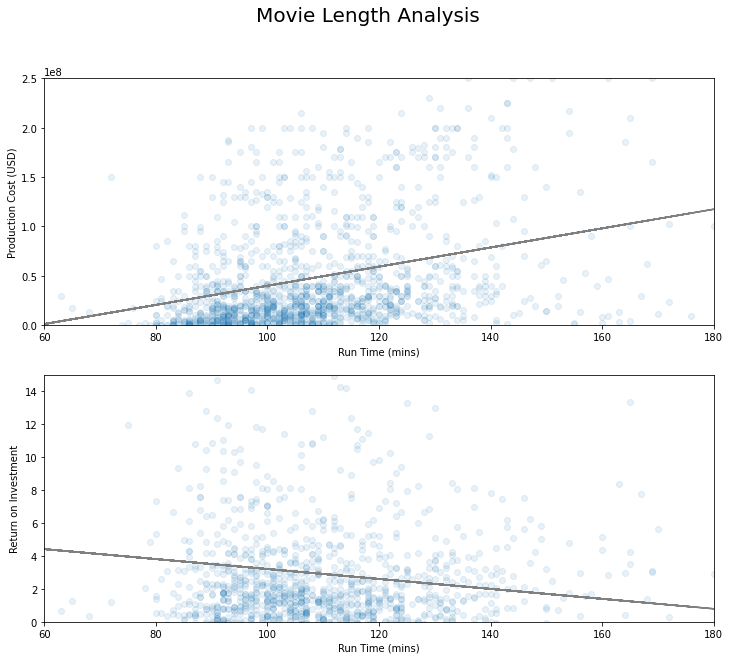

In [16]:
runtime_df = added_roi_to_melt_df[added_roi_to_melt_df['runtime_minutes'] > 0] #shape = 3613
runtime_df = runtime_df.drop_duplicates(subset='tconst')
x_runtime = runtime_df['runtime_minutes']
y_budget = runtime_df['production_budget']
y2_roi = runtime_df['ROI']

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 10))

m1, b1 = np.polyfit(x_runtime, y_budget, 1)
m2, b2 = np.polyfit(x_runtime, y2_roi, 1)

ax2.set_ylim(bottom=0, top=15)
ax1.set_ylim(bottom=0, top=250000000)
ax2.set_xlim(left=60, right=180)
ax1.set_xlim(left=60, right=180)

fig.suptitle('Movie Length Analysis', fontsize=20)

ax1.set_xlabel('Run Time (mins)')
ax1.set_ylabel('Production Cost (USD)')

ax2.set_xlabel('Run Time (mins)')
ax2.set_ylabel('Return on Investment')

#TODOS -- FIX AXIS LABELS FOR BETTER READABILITY. EX. 2.0 -> $200, UNITS USD -> MILLIONS
# ax1.ticklabel_format(style='plain')
# ax1.yaxis.set_major_formatter('${x:10.2f}')
ax1.scatter(x_runtime, y_budget, alpha=.1)
ax1.plot(x_runtime, m1*x_runtime + b1, c='grey')

ax2.scatter(x_runtime, y2_roi, alpha=.1)
ax2.plot(x_runtime, m2*x_runtime + b2, c='grey')

plt.savefig('Run_time_fig');

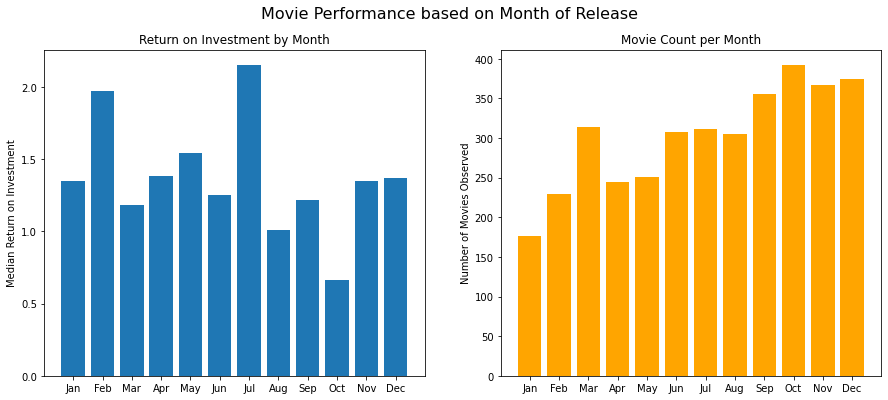

In [13]:
#CREATES PLOT OF ROI BY MONTH
release_month_df = added_roi_to_melt_df
release_month_df['Release_Month'] = release_month_df.apply(lambda x: x['release_date'][0:3], axis=1)
month_analysis_df = release_month_df.groupby(by='Release_Month', axis=0)['ROI'].describe()

#USE DICT FOR MAPPING MONTH INDEX TO MONTH NAME
mon_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
month_analysis_df['Month_index'] = month_analysis_df.index.map(mon_dict)
month_analysis_df = month_analysis_df.sort_values('Month_index')

x_bar_mon = list(month_analysis_df.index)
y_bar_mon = month_analysis_df['50%']

y_bar_count = month_analysis_df['count']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

fig.suptitle('Movie Performance based on Month of Release', fontsize=16)

ax1.set_title('Return on Investment by Month')
ax2.set_title('Movie Count per Month')

ax1.set_ylabel('Median Return on Investment')
ax2.set_ylabel('Number of Movies Observed')

ax1.bar(x_bar_mon, y_bar_mon)
ax2.bar(x_bar_mon, y_bar_count, color='orange')

plt.savefig('Release_Month_fig');